# Machine Learning Approaches for Magnetic Characterization
### Two-dimensional magnetic materials
Trevor David Rhone, Rensselaer Polytechnic Institute

Associated tutorial can be found on YouTube:
https://www.youtube.com/watch?v=yiyFQNWs2F4

In [ ]:
# import python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import os

### Download 2D magnetic materials formation energies data set:

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

- save the file to your google drive (with colab) or your local drive (jupyter notebook).
- Can also upload from github: https://github.com/trevorguru/materials_informatics_tutorial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Verify mount and check path for the csv file. Change the path below as needed.

In [ ]:
ls drive/MyDrive/ML_2D_materials_workshop/

magneticmoment_Ef_data.csv  ML_2D_exercises.ipynb


Open and load "magneticmoment_Ef_data.csv" using pandas.

In [ ]:
# Create dataframe of "magneticmoment_Ef_data.csv" using pandas.
# Change the path to magneticmoment_Ef_data.csv as needed.
data_path = "drive/MyDrive/ML_2D_materials_workshop/magneticmoment_Ef_data.csv"
df = pd.read_csv(data_path)

Explore the pandas object by examinging the columns:
- df.column()

A summary of the dataframe:
- df.head()


In [ ]:
df.columns

Index(['Unnamed: 0', 'formation_energy', 'elem_frac', 'elem_list', 'energy',
       'formula', 'magnetic_moment', 'spin_index', 'num_p', 'num_d', 'num_f',
       'atomic_rad', 'atomic_vol', 'covalent_rad', 'dipole', 'eaffinity',
       'num_electrons', 'atomic_rad_sum_dif', 'atomic_rad_std_dif',
       'atomic_rad_std', 'atomic_rad_avg', 'atomic_rad_max_dif',
       'atomic_vol_sum_dif', 'atomic_vol_std_dif', 'atomic_vol_std',
       'atomic_vol_avg', 'atomic_vol_max_dif', 'covalentrad_sum_dif',
       'covalentrad_std_dif', 'covalentrad_std', 'covalentrad_avg',
       'covalentrad_max_dif', 'dipole_sum_dif', 'dipole_std_dif', 'dipole_std',
       'dipole_avg', 'dipole_max_dif', 'eaffinity_sum_dif',
       'eaffinity_std_dif', 'eaffinity_std', 'e_affinity_avg',
       'e_affinity_max_dif', 'numelectron_sum_dif', 'numelectron_std_dif',
       'numelectron_std', 'numelectron_avg', 'numelectron_max_dif',
       'vdwradius_sum_dif', 'vdwradius_std_dif', 'vdwradius_std',
       'vdwradius_a

In [ ]:
df.head(n=3)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,num_f,atomic_rad,atomic_vol,covalent_rad,dipole,eaffinity,num_electrons,atomic_rad_sum_dif,atomic_rad_std_dif,atomic_rad_std,atomic_rad_avg,atomic_rad_max_dif,atomic_vol_sum_dif,atomic_vol_std_dif,atomic_vol_std,atomic_vol_avg,atomic_vol_max_dif,covalentrad_sum_dif,covalentrad_std_dif,covalentrad_std,covalentrad_avg,covalentrad_max_dif,dipole_sum_dif,dipole_std_dif,dipole_std,dipole_avg,dipole_max_dif,eaffinity_sum_dif,eaffinity_std_dif,eaffinity_std,...,numelectron_std_dif,numelectron_std,numelectron_avg,numelectron_max_dif,vdwradius_sum_dif,vdwradius_std_dif,vdwradius_std,vdwradius_avg,vdwradius_max_dif,e_negativity_sum_dif,e_negativity_std_dif,e_negativity_std,e_negativity_avg,e_negativity_max_dif,nvalence_sum_dif,nvalence_std_dif,nvalence_std,nvalence_avg,nvalence_max_dif,lastsubshell_avg,cmpd_skew_p,cmpd_skew_d,cmpd_skew_f,cmpd_sigma_p,cmpd_sigma_d,cmpd_sigma_f,frac_f,std_ion,sum_ion,mean_ion,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,0,"[130.0, 125.0, 137.0, 160.0, 128.0]","[7.23, 6.7, 13.6, 20.5, 17.0]","[122.0, 111.00000000000001, 121.0, 136.0, 111....","[78.4, 57.71, 39.43, 37.0, 24.93]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52, 15]",158.0,0.997877,0.008629,148.0,35,74.740,0.628972,0.172140,16.753,13.8,122.0,0.775396,0.005853,128.1,25,255.30,0.672182,0.154617,42.247,53.47,6.367902,0.959120,0.228103,...,0.761414,0.168444,41.0,37,136.0,0.997729,0.002938,203.3,31,136.0,0.997729,0.002938,203.3,31,22.0,0.807851,0.077778,6.0,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.887472,43.439369,8.687874,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,0,"[130.0, 125.0, 137.0, 160.0]","[7.23, 6.7, 13.6, 20.5]","[122.0, 111.00000000000001, 121.0, 136.0]","[78.4, 57.71, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52]",168.0,0.831633,0.009426,148.9,35,71.655,0.762022,0.217875,16.413,13.8,114.0,0.756233,0.005281,129.1,25,213.72,0.745633,0.098059,43.697,41.40,6.738856,0.825943,0.224304,...,0.926019,0.104636,42.7,28,49.5,0.785124,0.000359,206.4,11,49.5,0.785124,0.000359,206.4,11,22.5,0.813333,0.081600,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.611701,33.353977,8.338494,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,0,"[130.0, 125.0, 132.0, 137.0, 160.0]","[7.23, 6.7, 12.1, 13.6, 20.5]","[122.0, 111.00000000000001, 115.99999999999999...","[78.4, 57.71, 37.31, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.3895211, 1....","[24, 27, 14, 32, 52]",154.0,0.968081,0.007981,148.4,35,67.940,0.701470,0.173773,16.263,13.8,112.0,0.747848,0.004776,128.6,25,206.40,0.918620,0.104747,43.485,41.40,6.681520,0.686061,0.171739,...,0.746740,0.177650,40.9,38,52.0,0.738166,0.000352,206.3,11,52.0,0.738166,0.000352,206.3,11,24.0,0.822917,0.099881,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((3, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.551463,41.519819,8.303964,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92


Consider the following target property, y and descriptors, X.

y --> 'formation_energy'

X --> 'std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif'

- Create X and y data
- Perform data visualization

### Data visualization
Task #0

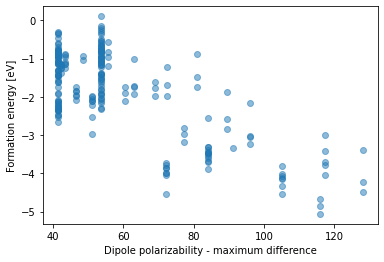

In [ ]:
# Visualize your data before attempting model fitting:
X = df[['dipole_max_dif']]
y = df['formation_energy']
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Dipole polarizability - maximum difference")
plt.ylabel("Formation energy [eV]")
plt.show()

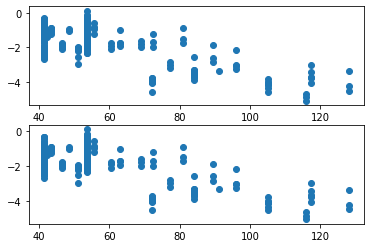

In [ ]:
# Visualize more deacriptors:

# Type your code below
# Use subplots to display muptiple plots side by side:
# Modify the following code
# ------
plt.subplot(2,1,1)
plt.scatter(df['dipole_max_dif'], df['formation_energy'])
plt.subplot(2,1,2)
plt.scatter(df['dipole_max_dif'], df['formation_energy'])

## Model creation and prediction
### Linear regression

Task #1:
- Do linear regression using the most important descriptor only (i.e. 'std_ion').
- Report the mean squared error and R^2.

See the sklearn documentation for assistance:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
X = df[['std_ion']] # only one descriptor
X = np.asarray(X)
y = df['formation_energy']

reg = LinearRegression().fit(X, y) # Create model
print("R^2 score", reg.score(X, y)) # Calculate R^2
print("coef_", reg.coef_)
print("intercept_", reg.intercept_)
X_pred = [[0.88],[0.61],[0.85],[0.85]] # Create X data for evaluation
y_pred = reg.predict(X_pred) # make model prediction given X data
print("y_pred", y_pred)

# Write a script to calculate the Mean squared error:
# type code here

R^2 score 0.09518064212060984
coef_ [-1.78411301]
intercept_ -0.31720531603671676
y_pred [-1.88722476 -1.40551425 -1.83370137 -1.83370137]


In [ ]:
# Trying fitting with another single descriptor
# type code here...

In [ ]:
# Plot your model alongside the X and y data.
# type code here...


Task #2:
- Do linear regression using all six descriptors above.
- Report the mean squared error and R^2.

See the sklearn documentation for assistance: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# type code here...

TASK #3:
- Repeat the above questions but first divide your data into a training set (80%) and test set (20%). Report performance scores on both the training set and test set.
- Use the sklearn function: train_test_split(X, y, test_size=0.33, random_state=42)
- Import needed modules.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

y = df['formation_energy'].values
X = df[['std_ion']] #one descriptor
# X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']] #six descriptors

# Create X_train, X_test, y_train, y_test

# type code to create train/test split here:
# X_train =
# X_test =
# y_train =
# y_test =

TASK #4
- Use X_train to train a linear model
- Generate predictions using X_test and X_train

In [ ]:
# type code to create the model and to fit the model (use the training data):

# type code to generate model predictions and scores (use both the training data and the test set):

Task #5
- Create a random forest regression model. Train it and generate predictions on X_train and X_test.
- Compare the R^2 scores with those from the linear model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=2, random_state=0)
# NOTE:
# RandomForestRegressor has hyperparameters, such as max_depth,
# which determines the size of the decision trees used to create the random forest

# Modify the code below and complete the task #5
# ------
# rf_model.fit(X, y)
# print(rf_model.predict([[0, 0, 0, 0]]))


Task #6

Hyperparameter tuning:
- Tune the 'max_depth' hyperparameter to optimize the random forest model
  - Search an array of possible values of max_depth,
  - generate a series of corresponding models,
  - calculate the performance of each model and
  - determine the best score

Evaluate max_depth values:  [ 1  2  3  4  5  6  7  8  9 10]


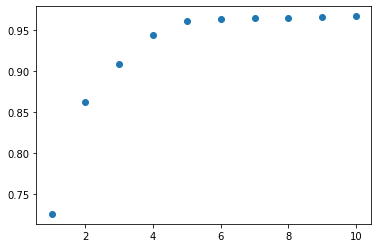

In [ ]:
def hyper_search(X_train, y_train, X_val, y_val):
  """
  function that searches evaluates a list of hyperparameters
  """
  max_depth_values = np.arange(10)+1
  print("Evaluate the following values for max_depth : ", max_depth_values)
  scores = []
  for ith, max_depth in enumerate(max_depth_values):
    rf_model_i = RandomForestRegressor(max_depth=max_depth, n_estimators = 5, random_state=0)
    rf_model_i.fit(X_train, y_train)
    score = rf_model_i.score(X_val, y_val)
    scores.append(score)
    # print(ith, score)
  return max_depth_values, scores

X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']]
X = np.asarray(X)

# Modify the code below using the training data you created previously
# What is the best hyperparameter for the model?
X_train = X[:100,:4]
y_train = y[:100]
X_val = X[50:80,:4]
y_val = y[50:80]

max_depth_values, scores = hyper_search(X_train, y_train, X_val, y_val)
plt.scatter(max_depth_values, scores)
# add axis labels
plt.show()

# type code to determine the best hyperparameter for the model below:

# BONUS [come back to this if there's time]:
# Modify code in function to calculate both training and validation predictions/scores
# Plot both the training and test scores

Notice that RandomForestRegressor() has more than one hyperparameter.
- Do a two-dimensional grid search instead of a one-dimensional grid search as shown above. (Choose an appropriate range of values for each hyperparameter).
- Display your results using plt.imshow()
- Determine the best combination of hyperparameters
- Create a model using the best combination of hyperparameters

In [ ]:
# write your code here

TASK #7
- Plot the DFT formation energy versus the machine learning predicted formation energy for the training set and the test set
  - Use the machine learning model (and hyperparameters) with the best performance

In [ ]:
# write your code here

=====================================================================================

CONGRATULATIONS!!! 👏

You've completed the exercises and are well on your way to becoming an expert in materials informatics.